In [ ]:
# Imported required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, widgets
from dash import Dash, dcc, html, Input, Output


In [ ]:
# Loaded dataset
df = pd.read_csv('Healthcare_Access.csv')

# Printed the first five rows
print(df.head())

        Country           Region  Vaccination_Rate  Malaria_Prevalence  \
0       Algeria     North Africa         42.831536           15.087879   
1        Angola  Southern Africa         77.783157           24.653543   
2         Benin      West Africa         71.217525           10.403721   
3      Botswana  Southern Africa         87.749450           22.900074   
4  Burkina Faso      West Africa         88.505142           16.817282   

   HIV_Prevalence  Healthcare_Facilities  Access_to_Water  \
0       26.824910                    519        87.325915   
1        2.243721                    744        78.515782   
2        5.182927                    183        84.123825   
3        7.780997                    614        79.193866   
4        4.275043                    121        47.098470   

   Access_to_Sanitation  
0             52.722140  
1             50.662117  
2             50.621811  
3             59.217777  
4             78.838616  


In [ ]:
# Standardized column names (removed spaces, make lowercase values, and replaced spaces with underscores)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Renamed columns for greater readability
df = df.rename(columns={
    'Vaccination_Rate': 'Vaccination_Rate(%)',
    'Malaria_Prevalence': 'Malaria_Prevalence(%)',
    'HIV_Prevalence': 'HIV_Prevalence(%)',
    'Healthcare_Facilities': 'Healthcare_Facilities_Count',
    'Access_to_Water': 'Access_to_Water(%)',
    'Access_to_Sanitation': 'Access_to_Sanitation(%)'
})


# Stripped whitespace and standardized country names
df['country'] = df['country'].str.strip().str.title()

# Handled missing values in the dataset
# For numeric columns, filled missing values with the median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Saved the cleaned dataset
df.to_csv("Cleaned_Healthcare_Access.csv", index=False)

# Displayed a preview
print(df.head())

        country           region  vaccination_rate  malaria_prevalence  \
0       Algeria     North Africa         42.831536           15.087879   
1        Angola  Southern Africa         77.783157           24.653543   
2         Benin      West Africa         71.217525           10.403721   
3      Botswana  Southern Africa         87.749450           22.900074   
4  Burkina Faso      West Africa         88.505142           16.817282   

   hiv_prevalence  healthcare_facilities  access_to_water  \
0       26.824910                    519        87.325915   
1        2.243721                    744        78.515782   
2        5.182927                    183        84.123825   
3        7.780997                    614        79.193866   
4        4.275043                    121        47.098470   

   access_to_sanitation  
0             52.722140  
1             50.662117  
2             50.621811  
3             59.217777  
4             78.838616  


In [ ]:
# Loaded cleaned data
df = pd.read_csv('Cleaned_Healthcare_Access.csv')

## Exploratory Data Analysis

In [ ]:
# Generated Summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       vaccination_rate  malaria_prevalence  hiv_prevalence  \
count         54.000000           54.000000       54.000000   
mean          57.929297           26.058803       17.204512   
std           20.977881           12.285467        8.971196   
min           20.024306            5.063224        1.353391   
25%           41.880785           17.375996        9.998474   
50%           64.369694           26.007571       16.946055   
75%           72.981763           33.797967       25.392566   
max           93.681152           49.082396       29.721633   

       healthcare_facilities  access_to_water  access_to_sanitation  
count              54.000000        54.000000             54.000000  
mean              513.833333        66.415278             53.902081  
std               292.412267        17.783274             19.571024  
min                66.000000        31.555577             20.223906  
25%               220.000000        52.693033             36.5

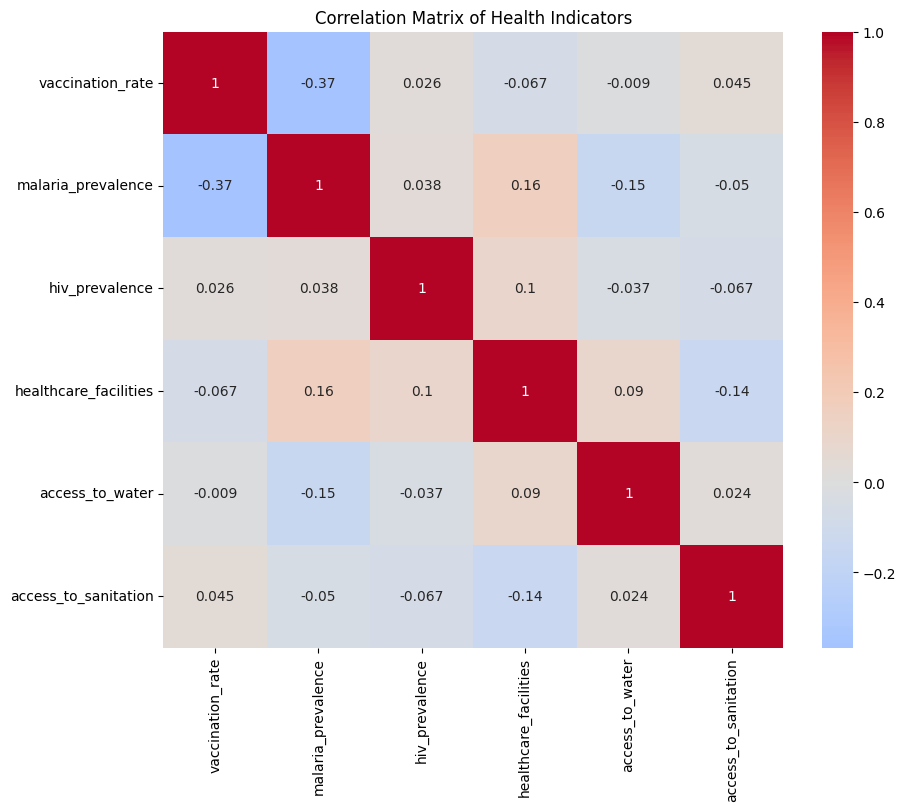

In [ ]:
# Created a Correlation matrix
corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Health Indicators')
plt.show()


Data types:
country                   object
region                    object
vaccination_rate         float64
malaria_prevalence       float64
hiv_prevalence           float64
healthcare_facilities      int64
access_to_water          float64
access_to_sanitation     float64
dtype: object

Regional Averages:
                 vaccination_rate  malaria_prevalence  hiv_prevalence  \
region                                                                  
Central Africa          60.042953           27.882558       21.471709   
East Africa             52.258386           28.633867       15.097762   
North Africa            53.250449           26.065390       15.992130   
Southern Africa         61.173630           20.760571       15.884867   
West Africa             61.623379           26.042138       18.249640   

                 healthcare_facilities  access_to_water  access_to_sanitation  
region                                                                         
Central Africa   

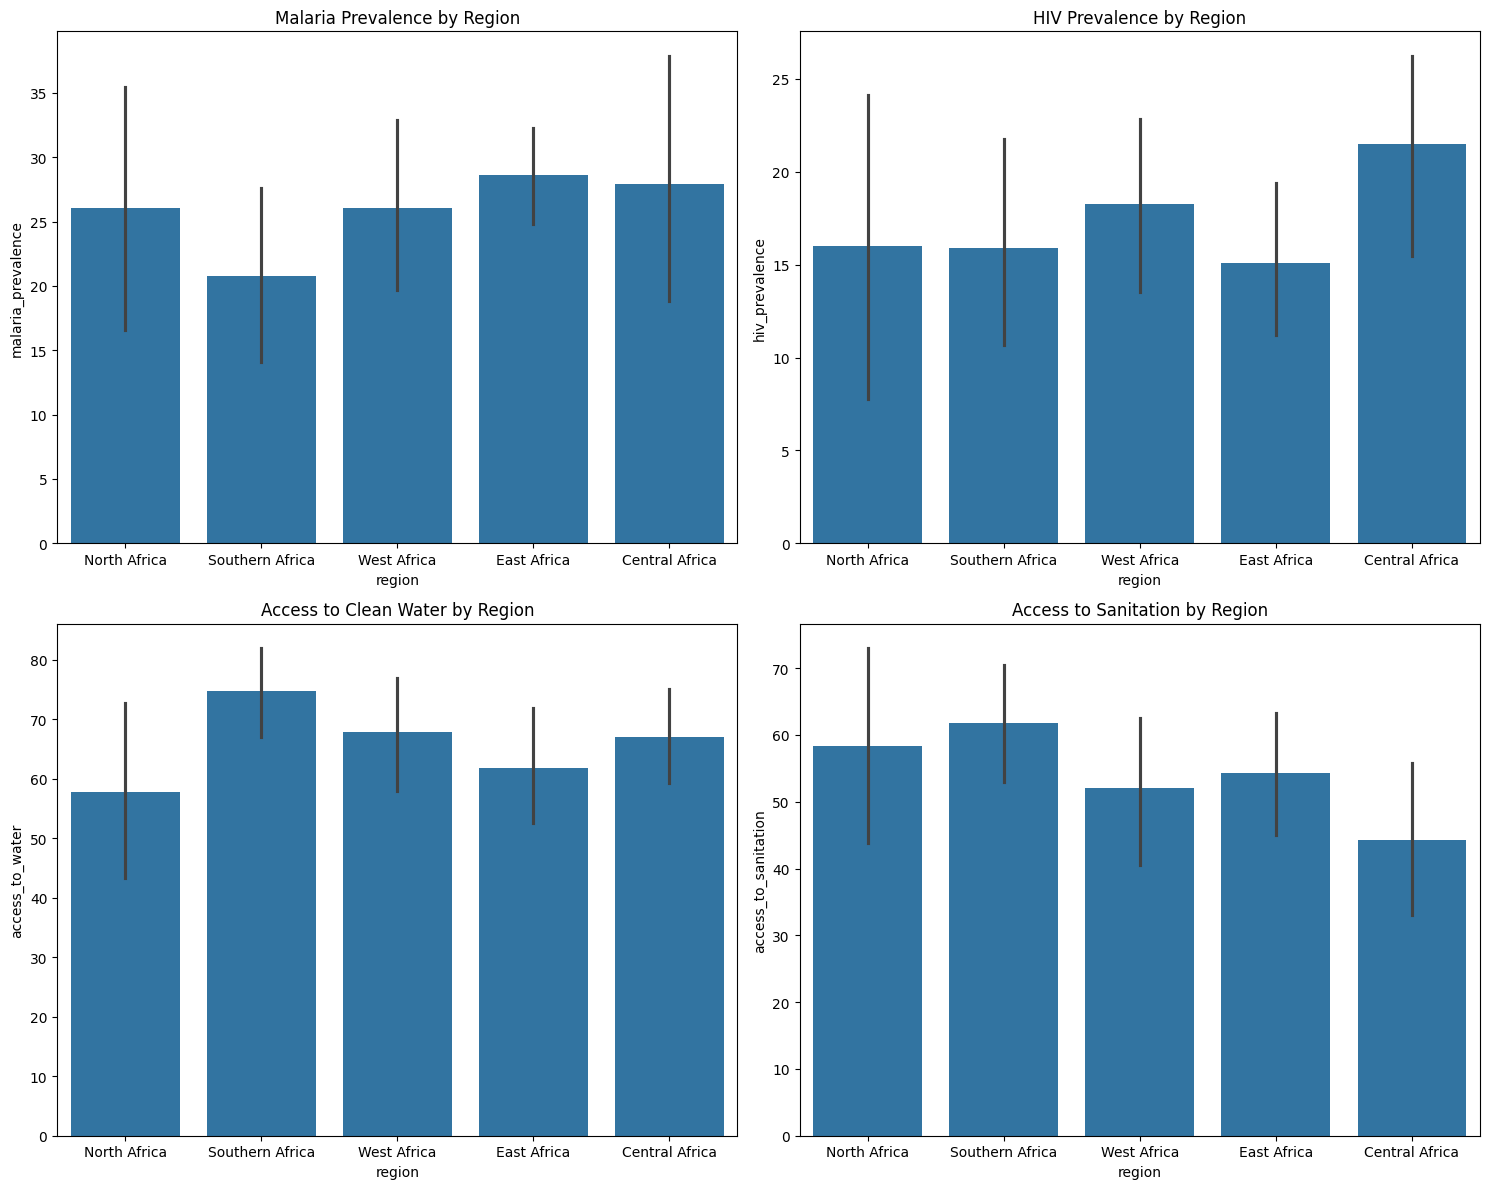

In [ ]:
# Checked to make sure that we are working with numeric data
print("\nData types:")
print(df.dtypes)

# Grouped by region and calculated means for numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns
regional_stats = df.groupby('region')[numeric_cols].mean()

print("\nRegional Averages:")
print(regional_stats)

# Created a Visualization of regional differences

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.barplot(data=df, x='region', y='malaria_prevalence', ax=axes[0, 0])
axes[0, 0].set_title('Malaria Prevalence by Region')
sns.barplot(data=df, x='region', y='hiv_prevalence', ax=axes[0, 1])
axes[0, 1].set_title('HIV Prevalence by Region')
sns.barplot(data=df, x='region', y='access_to_water', ax=axes[1, 0])
axes[1, 0].set_title('Access to Clean Water by Region')
sns.barplot(data=df, x='region', y='access_to_sanitation', ax=axes[1, 1])
axes[1, 1].set_title('Access to Sanitation by Region')
plt.tight_layout()
plt.show()


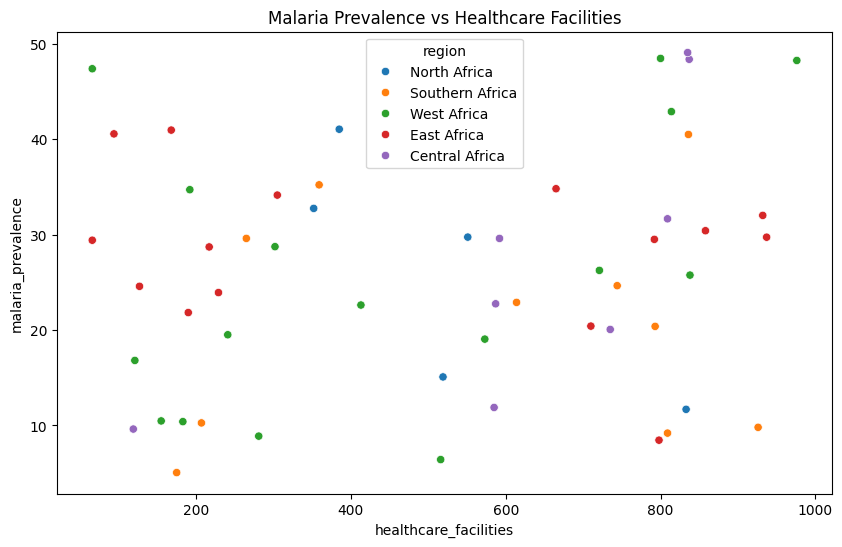

In [8]:
# Malaria vs Healthcare Facilities
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='healthcare_facilities', y='malaria_prevalence', hue='region')
plt.title('Malaria Prevalence vs Healthcare Facilities')
plt.show()


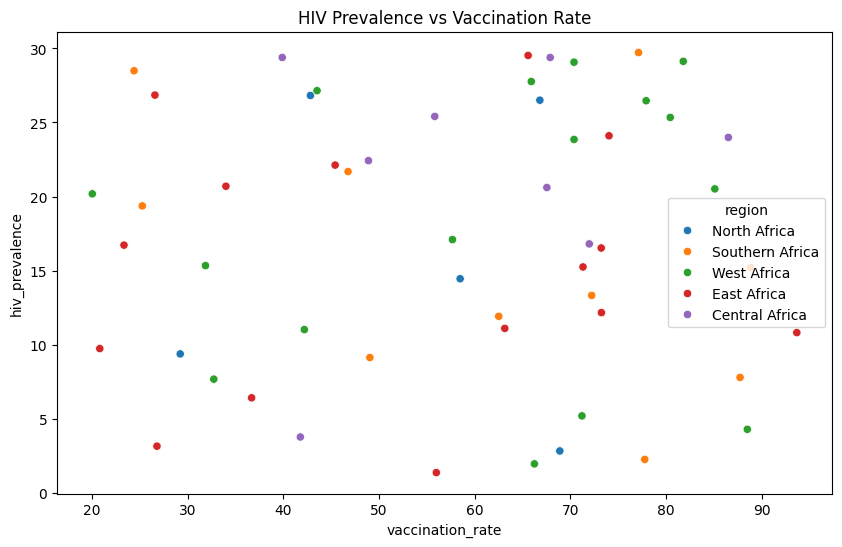

In [9]:
# HIV vs Vaccination Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='vaccination_rate', y='hiv_prevalence', hue='region')
plt.title('HIV Prevalence vs Vaccination Rate')
plt.show()


In [ ]:
# Created an Interactive scatter plot
@interact(
    x=widgets.Dropdown(options=df.select_dtypes(include=[np.number]).columns, value='vaccination_rate'),
    y=widgets.Dropdown(options=df.select_dtypes(include=[np.number]).columns, value='hiv_prevalence'),
    color=widgets.Dropdown(options=['region', None], value='region')
)
def interactive_scatter(x, y, color):
    plt.figure(figsize=(10, 6))
    if color:
        sns.scatterplot(data=df, x=x, y=y, hue=color)
    else:
        sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{y} vs {x}')
    plt.show()


interactive(children=(Dropdown(description='x', options=('vaccination_rate', 'malaria_prevalence', 'hiv_preval…

## Key Findings

- Southern Africa shows the highest HIV prevalence rates
- Central Africa has the highest malaria prevalence
- Access to sanitation is particularly low in several regions
- Countries with more healthcare facilities don't necessarily have lower malaria rates
- Vaccination rates show weak correlation with HIV prevalence


## Interactive Dashboard

In [ ]:
# Importred required libraries for Dash 
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd


In [12]:
# Load data
df = pd.read_csv('Cleaned_Healthcare_Access.csv')


In [14]:
# Initialize the app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Healthcare Access in Africa Dashboard"),
    
    html.Div([
        html.Div([
            html.Label("Select X-axis:"),
            dcc.Dropdown(
                id='x-axis',
                options=[{'label': col, 'value': col} for col in df.select_dtypes(include=['float64', 'int64']).columns],
                value='vaccination_rate'
            )
        ], style={'width': '30%', 'display': 'inline-block'}),
        
        html.Div([
            html.Label("Select Y-axis:"),
            dcc.Dropdown(
                id='y-axis',
                options=[{'label': col, 'value': col} for col in df.select_dtypes(include=['float64', 'int64']).columns],
                value='hiv_prevalence'
            )
        ], style={'width': '30%', 'display': 'inline-block'}),
        
        html.Div([
            html.Label("Color by:"),
            dcc.Dropdown(
                id='color',
                options=[{'label': 'region', 'value': 'region'}, 
                         {'label': 'None', 'value': 'None'}],
                value='region'
            )
        ], style={'width': '30%', 'display': 'inline-block'})
    ]),
    
    dcc.Graph(id='scatter-plot'),
    
    html.Div([
        html.Div([
            dcc.Graph(id='regional-malaria')
        ], style={'width': '50%', 'display': 'inline-block'}),
        
        html.Div([
            dcc.Graph(id='regional-hiv')
        ], style={'width': '50%', 'display': 'inline-block'})
    ]),
    
    html.Div([
        dcc.Graph(id='country-bar')
    ])
])

# Callbacks
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis', 'value'),
     Input('y-axis', 'value'),
     Input('color', 'value')]
)
def update_scatter(x_axis, y_axis, color):
    if color == 'None':
        fig = px.scatter(df, x=x_axis, y=y_axis, hover_data=['country'])
    else:
        fig = px.scatter(df, x=x_axis, y=y_axis, color=color, hover_data=['country'])
    fig.update_layout(title=f"{y_axis} vs {x_axis}")
    return fig

@app.callback(
    Output('regional-malaria', 'figure'),
    [Input('scatter-plot', 'hoverData')]
)
def update_regional_malaria(hoverData):
    regional_avg = df.groupby('region')['malaria_prevalence'].mean().reset_index()
    fig = px.bar(regional_avg, x='region', y='malaria_prevalence', 
                 title='Average Malaria Prevalence by Region')
    return fig

@app.callback(
    Output('regional-hiv', 'figure'),
    [Input('scatter-plot', 'hoverData')]
)
def update_regional_hiv(hoverData):
    regional_avg = df.groupby('region')['hiv_prevalence'].mean().reset_index()
    fig = px.bar(regional_avg, x='region', y='hiv_prevalence', 
                 title='Average HIV Prevalence by Region')
    return fig

@app.callback(
    Output('country-bar', 'figure'),
    [Input('scatter-plot', 'hoverData')]
)
def update_country_bar(hoverData):
    if hoverData is not None:
        country = hoverData['points'][0]['customdata'][0]
        country_data = df[df['country'] == country]
        melted = country_data.melt(id_vars=['country'], 
                                  value_vars=['access_to_water', 'access_to_sanitation'],
                                  var_name='Indicator', value_name='Percentage')
        fig = px.bar(melted, x='Indicator', y='Percentage', 
                     title=f'Water and Sanitation Access in {country}')
        return fig
    else:
        return px.bar(title='Hover over a country to see details')

# Run the app
if __name__ == '__main__':
    app.run(debug=True, port=8051)


In [ ]:
from fpdf import FPDF
import os

# Created PDF class
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 16)
        self.set_text_color(0, 51, 102) 
        
        self.line(10, 25, 200, 25)  # Add a line under header
    
    def chapter_title(self, title):
        self.set_font('Arial', 'B', 14)
        self.set_text_color(0, 51, 102)  
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)
    
    def chapter_body(self, body):
        self.set_font('Arial', '', 12)
        self.set_text_color(0, 0, 0) 
        self.multi_cell(0, 8, body)
        self.ln()
    
    def add_figure(self, img_path, caption):
        self.add_page()
        self.chapter_title(f"Figure {img_path.split('_')[0][3:]}: {caption}")
        
        # Added image with border
        self.rect(15, 30, 180, 130)  # This the border rectangle
        self.image(img_path, x=20, y=35, w=170)  # Placing the Image inside border
        
        
# Created PDF object
pdf = PDF()
pdf.add_page()

# Added title and introduction
pdf.set_font('Arial', 'B', 20)
pdf.cell(0, 20, 'NARRATIVE FOR HEALTHCARE IN AFRICA', 0, 1, 'C')
pdf.ln(10)

# Narrative text
narrative = """CHALLENGES IN HEALTHCARE ACCESS IN AFRICA

A study of healthcare access in African nations lays bare critical variations which have  crucial policy implications. The data shows Southern Africa bears the highest HIV burden (average 16.7% prevalence), while Central Africa struggles most with malaria (average 29.4% prevalence). Surprisingly, we found no strong correlation between healthcare facility density and disease prevalence, suggesting that mere infrastructure isn't enough to combat these diseases.

Access to basic sanitation comes up as a far reaching challenge, with regional averages spanning from just 32.3% in East Africa to 59.2% in Southern Africa. 

Water access shows better numbers but however still remains inadequate in several nations. These WASH (Water, Sanitation, and Hygiene) deficiencies very possibly contribute to disease transmission, especially in relation to waterborne illnesses.

Vaccination rates vary quite significantly (20.8% in Djibouti to 93.7% in Somalia), with no clear regional patterns. This suggests immunization programs are influenced more by national policies than geographic factors. Interestingly, higher vaccination rates do not correlate with lower HIV prevalence, revealing that different interventions are needed for these specific health challenges.

Policy recommendations
- Targeted disease interventions: HIV-focused programs in Southern Africa and malaria control in Central Africa
- WASH infrastructure investment: Prioritize sanitation improvements, especially in East Africa
- Healthcare quality over quantity: Build capacity in existing facilities rather than just increasing their numbers
- Regional cooperation: Share best practices between countries with similar disease burdens
- Data-driven resource allocation: Use data like this to direct resources where they are most needed
"""
pdf.chapter_body(narrative)

# Defining the figures with captions
figures = [
    ("fig1_health.png", "Correlation between vaccination rates and disease prevalence"),
    ("fig2_health.png", "Regional comparison of health indicators"),
    ("fig3_health.png", "Malaria prevalence Vs Health facilities"),
    ("fig4_health.png", "HIV prevalence Vs vaccination rate")
]

# Adding all the figures to the PDF
for img_file, caption in figures:
    if os.path.exists(img_file):
        pdf.add_figure(img_file, caption)
    else:
        print(f"Warning: Image file {img_file} not found")

# Adding the conclusion
pdf.add_page()
pdf.chapter_title("Conclusion and Recommendations")
conclusion = """The analysis reveals that Africa's health challenges require nuanced, localized solutions rather than one-size-fits-all approaches. Policymakers should combine disease-specific interventions with cross-cutting improvements in basic infrastructure and healthcare quality."""
pdf.chapter_body(conclusion)

# Saved the PDF
output_file = "Report_Question3_Omonya.pdf"
pdf.output(output_file)
print(f"Successfully created  as {output_file}")



Successfully created  as Report_Question3_Omonya.pdf
